In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pooch

from fair import FAIR
from fair.interface import fill, initialise
from fair.io import read_properties

/home/cwomack/.conda/envs/gchp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### A Calibrate, Constrained Ensemble from FaIR
Taken from https://docs.fairmodel.net/en/latest/examples/calibrated_constrained_ensemble.html

In [2]:
f = FAIR(ch4_method="Thornhill2021")
f.define_time(1750, 2300, 1)  # start, end, step
scenarios = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp434", "ssp460", "ssp534-over", "ssp585"]
f.define_scenarios(scenarios)

In [3]:
fair_params_1_2_0_obj = pooch.retrieve(
    url = 'https://zenodo.org/record/8399112/files/calibrated_constrained_parameters.csv',
    known_hash = 'md5:de3b83432b9d071efdd1427ad31e9076',
)

df_configs = pd.read_csv(fair_params_1_2_0_obj, index_col=0)
configs = df_configs.index  # this is used as a label for the "config" axis
f.define_configs(configs)

configs

df_configs.head()

,clim_gamma,clim_c1,clim_c2,clim_c3,clim_kappa1,clim_kappa2,clim_kappa3,clim_epsilon,clim_sigma_eta,clim_sigma_xi,...,fscale_Stratospheric water vapour,fscale_Land use,fscale_Volcanic,fscale_solar_amplitude,fscale_solar_trend,fscale_Light absorbing particles on snow and ice,fscale_Contrails,fscale_CO2,cc_co2_concentration_1750,seed
1230,1.769676,3.624462,7.990559,351.593545,1.428812,3.185628,0.492204,0.387406,0.494609,0.619379,...,1.510615,0.786075,0.937678,0.460204,-0.016256,1.686514,1.405533,0.987613,277.625450,1846533
1715,2.143142,4.889789,21.813475,101.917617,1.970173,1.071125,1.328655,1.465390,0.394019,0.367552,...,0.876840,1.188071,1.038958,0.343548,-0.056502,1.043790,0.703501,0.968117,279.909140,2040048
2658,4.177349,5.204886,20.998936,21.085816,0.797920,2.526630,1.000076,1.251896,0.653188,0.547847,...,0.383282,0.914854,0.744196,0.458884,-0.002800,0.544324,0.820430,1.011921,276.858025,2416305
3898,2.044461,4.592895,14.656268,15.303202,0.620333,2.832756,1.154977,2.160007,0.461311,0.260020,...,1.631921,0.881545,1.073446,1.016936,-0.010243,1.276720,0.724910,0.948908,278.869631,2911065
5915,4.812140,4.582716,9.051207,160.760900,0.944823,1.820105,1.024776,1.131748,0.324605,0.425571,...,0.763970,0.908647,1.014453,0.713096,0.010865,1.916141,0.810404,0.963535,278.236615,3715848


In [4]:
species, properties = read_properties(filename='FaIR_Data/species_configs_properties_calibration1.2.0.csv')
f.define_species(species, properties)

In [5]:
f.allocate()

In [6]:
f.fill_from_rcmip()
f.emissions

<xarray.DataArray (timepoints: 550, scenario: 8, config: 1001, specie: 64)>
array([[[[0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan]],

        [[0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
...
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan]],

        [[0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 1.75e+03 1.752e+03 ... 2.298e+03 2.3e+03
  * scenario    (scenario) <U11 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * config      (config) int64 1230 1715 2658 3898 ... 1497041 1497105 1498424
  * specie      (specie) <U43 'CO2 FFI' ... 'Equivalent effective stratospher...

In [7]:
rcmip_emissions_file = pooch.retrieve(
    url="doi:10.5281/zenodo.4589756/rcmip-emissions-annual-means-v5-1-0.csv",
    known_hash="md5:4044106f55ca65b094670e7577eaf9b3",
)
df_emis = pd.read_csv(rcmip_emissions_file)
gfed_sectors = [
    "Emissions|NOx|MAGICC AFOLU|Agricultural Waste Burning",
    "Emissions|NOx|MAGICC AFOLU|Forest Burning",
    "Emissions|NOx|MAGICC AFOLU|Grassland Burning",
    "Emissions|NOx|MAGICC AFOLU|Peat Burning",
]
for scenario in scenarios:
    f.emissions.loc[dict(specie="NOx", scenario=scenario)] = (
        df_emis.loc[
            (df_emis["Scenario"] == scenario)
            & (df_emis["Region"] == "World")
            & (df_emis["Variable"].isin(gfed_sectors)),
            "1750":"2300",
        ]
        .interpolate(axis=1)
        .values.squeeze()
        .sum(axis=0)
        * 46.006
        / 30.006
        + df_emis.loc[
            (df_emis["Scenario"] == scenario)
            & (df_emis["Region"] == "World")
            & (df_emis["Variable"] == "Emissions|NOx|MAGICC AFOLU|Agriculture"),
            "1750":"2300",
        ]
        .interpolate(axis=1)
        .values.squeeze()
        + df_emis.loc[
            (df_emis["Scenario"] == scenario)
            & (df_emis["Region"] == "World")
            & (df_emis["Variable"] == "Emissions|NOx|MAGICC Fossil and Industrial"),
            "1750":"2300",
        ]
        .interpolate(axis=1)
        .values.squeeze()
    )[:550, None]

In [8]:
solar_obj = pooch.retrieve(
    url = 'https://raw.githubusercontent.com/chrisroadmap/fair-add-hfc/main/data/solar_erf_timebounds.csv',
    known_hash = 'md5:98f6f4c5309d848fea89803683441acf',
)

volcanic_obj = pooch.retrieve(
    url = 'https://raw.githubusercontent.com/chrisroadmap/fair-calibrate/main/data/forcing/volcanic_ERF_1750-2101_timebounds.csv',
    known_hash = 'md5:c0801f80f70195eb9567dbd70359219d',
)


In [9]:
df_solar = pd.read_csv(solar_obj, index_col="year")
df_volcanic = pd.read_csv(volcanic_obj)

In [10]:
solar_forcing = np.zeros(551)
volcanic_forcing = np.zeros(551)
volcanic_forcing[:352] = df_volcanic.erf.values
solar_forcing = df_solar["erf"].loc[1750:2300].values

trend_shape = np.ones(551)
trend_shape[:271] = np.linspace(0, 1, 271)

In [11]:
fill(
    f.forcing,
    volcanic_forcing[:, None, None] * df_configs["fscale_Volcanic"].values.squeeze(),
    specie="Volcanic",
)
fill(
    f.forcing,
    solar_forcing[:, None, None] * df_configs["fscale_solar_amplitude"].values.squeeze()
    + trend_shape[:, None, None] * df_configs["fscale_solar_trend"].values.squeeze(),
    specie="Solar",
)

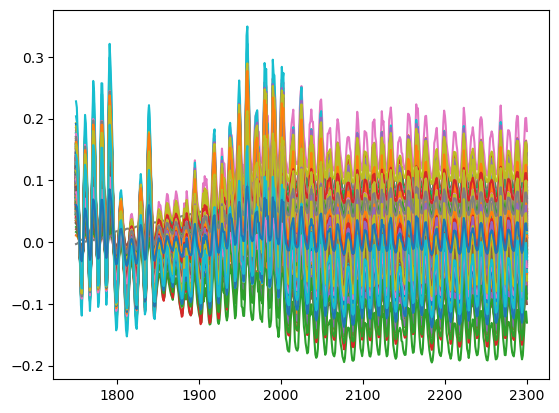

In [12]:
plt.plot(f.timebounds, f.forcing.loc[dict(specie="Solar", scenario="ssp245")]);


In [13]:
fill(f.climate_configs["ocean_heat_capacity"], df_configs.loc[:, "clim_c1":"clim_c3"].values)
fill(
    f.climate_configs["ocean_heat_transfer"],
    df_configs.loc[:, "clim_kappa1":"clim_kappa3"].values,
)
fill(f.climate_configs["deep_ocean_efficacy"], df_configs["clim_epsilon"].values.squeeze())
fill(f.climate_configs["gamma_autocorrelation"], df_configs["clim_gamma"].values.squeeze())
fill(f.climate_configs["sigma_eta"], df_configs["clim_sigma_eta"].values.squeeze())
fill(f.climate_configs["sigma_xi"], df_configs["clim_sigma_xi"].values.squeeze())
fill(f.climate_configs["seed"], df_configs["seed"])
fill(f.climate_configs["stochastic_run"], True)
fill(f.climate_configs["use_seed"], True)
fill(f.climate_configs["forcing_4co2"], df_configs["clim_F_4xCO2"])

In [14]:
f.fill_species_configs(filename='FaIR_Data/species_configs_properties_calibration1.2.0.csv')

# carbon cycle
fill(f.species_configs["iirf_0"], df_configs["cc_r0"].values.squeeze(), specie="CO2")
fill(f.species_configs["iirf_airborne"], df_configs["cc_rA"].values.squeeze(), specie="CO2")
fill(f.species_configs["iirf_uptake"], df_configs["cc_rU"].values.squeeze(), specie="CO2")
fill(f.species_configs["iirf_temperature"], df_configs["cc_rT"].values.squeeze(), specie="CO2")

# aerosol indirect
fill(f.species_configs["aci_scale"], df_configs["aci_beta"].values.squeeze())
fill(f.species_configs["aci_shape"], df_configs["aci_shape_so2"].values.squeeze(), specie="Sulfur")
fill(f.species_configs["aci_shape"], df_configs["aci_shape_bc"].values.squeeze(), specie="BC")
fill(f.species_configs["aci_shape"], df_configs["aci_shape_oc"].values.squeeze(), specie="OC")

# aerosol direct
for specie in [
    "BC",
    "CH4",
    "N2O",
    "NH3",
    "NOx",
    "OC",
    "Sulfur",
    "VOC",
    "Equivalent effective stratospheric chlorine"
]:
    fill(f.species_configs["erfari_radiative_efficiency"], df_configs[f"ari_{specie}"], specie=specie)

# forcing scaling
for specie in [
    "CO2",
    "CH4",
    "N2O",
    "Stratospheric water vapour",
    "Contrails",
    "Light absorbing particles on snow and ice",
    "Land use"
]:
    fill(f.species_configs["forcing_scale"], df_configs[f"fscale_{specie}"].values.squeeze(), specie=specie)
# the halogenated gases all take the same scale factor
for specie in [
    "CFC-11",
    "CFC-12",
    "CFC-113",
    "CFC-114",
    "CFC-115",
    "HCFC-22",
    "HCFC-141b",
    "HCFC-142b",
    "CCl4",
    "CHCl3",
    "CH2Cl2",
    "CH3Cl",
    "CH3CCl3",
    "CH3Br",
    "Halon-1211",
    "Halon-1301",
    "Halon-2402",
    "CF4",
    "C2F6",
    "C3F8",
    "c-C4F8",
    "C4F10",
    "C5F12",
    "C6F14",
    "C7F16",
    "C8F18",
    "NF3",
    "SF6",
    "SO2F2",
    "HFC-125",
    "HFC-134a",
    "HFC-143a",
    "HFC-152a",
    "HFC-227ea",
    "HFC-23",
    "HFC-236fa",
    "HFC-245fa",
    "HFC-32",
    "HFC-365mfc",
    "HFC-4310mee",
]:
    fill(f.species_configs["forcing_scale"], df_configs["fscale_minorGHG"].values.squeeze(), specie=specie)

# ozone
for specie in ["CH4", "N2O", "Equivalent effective stratospheric chlorine", "CO", "VOC", "NOx"]:
    fill(f.species_configs["ozone_radiative_efficiency"], df_configs[f"o3_{specie}"], specie=specie)

# initial value of CO2 concentration (but not baseline for forcing calculations)
fill(
    f.species_configs["baseline_concentration"],
    df_configs["cc_co2_concentration_1750"].values.squeeze(),
    specie="CO2"
)

In [15]:
initialise(f.concentration, f.species_configs["baseline_concentration"])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)

In [16]:
f.run()

Running 8008 projections in parallel: 100%|██████████| 550/550 [01:54<00:00,  4.81timesteps/s]


In [17]:
fancy_titles = {
    "ssp119": "SSP1-1.9",
    "ssp126": "SSP1-2.6",
    "ssp245": "SSP2-4.5",
    "ssp370": "SSP3-7.0",
    "ssp434": "SSP4-3.4",
    "ssp460": "SSP4-6.0",
    "ssp534-over": "SSP5-3.4-overshoot",
    "ssp585": "SSP5-8.5",
}

ar6_colors = {
    "ssp119": "#00a9cf",
    "ssp126": "#003466",
    "ssp245": "#f69320",
    "ssp370": "#df0000",
    "ssp434": "#2274ae",
    "ssp460": "#b0724e",
    "ssp534-over": "#92397a",
    "ssp585": "#980002",
}

In [18]:
weights_51yr = np.ones(52)
weights_51yr[0] = 0.5
weights_51yr[-1] = 0.5

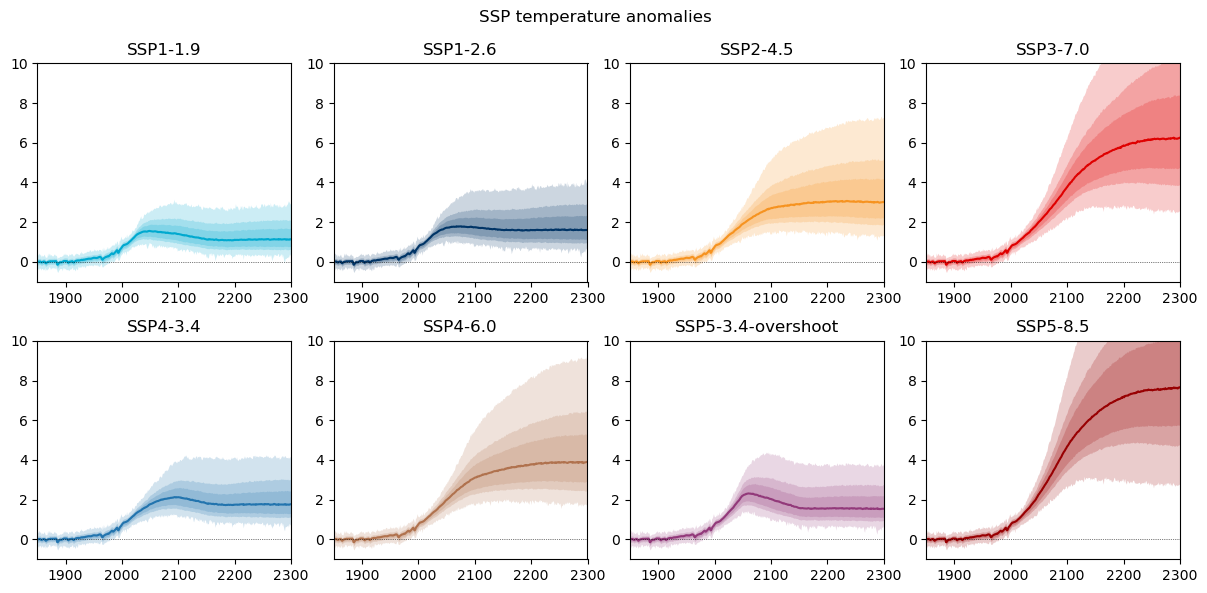

In [19]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

for i, scenario in enumerate(scenarios):
    for pp in ((0, 100), (5, 95), (16, 84)):
        ax[i // 4, i % 4].fill_between(
            f.timebounds,
            np.percentile(
                f.temperature.loc[dict(scenario=scenario, layer=0)]
                - np.average(
                    f.temperature.loc[
                        dict(scenario=scenario, timebounds=np.arange(1850, 1902), layer=0)
                    ],
                    weights=weights_51yr,
                    axis=0
                ),
                pp[0],
                axis=1,
            ),
            np.percentile(
                f.temperature.loc[dict(scenario=scenario, layer=0)]
                - np.average(
                    f.temperature.loc[
                        dict(scenario=scenario, timebounds=np.arange(1850, 1902), layer=0)
                    ],
                    weights=weights_51yr,
                    axis=0
                ),
                pp[1],
                axis=1,
            ),
            color=ar6_colors[scenarios[i]],
            alpha=0.2,
            lw=0
        )

    ax[i // 4, i % 4].plot(
        f.timebounds,
        np.median(
            f.temperature.loc[dict(scenario=scenario, layer=0)]
            - np.average(
                f.temperature.loc[
                    dict(scenario=scenario, timebounds=np.arange(1850, 1902), layer=0)
                ],
                weights=weights_51yr,
                axis=0
            ),
            axis=1,
        ),
        color=ar6_colors[scenarios[i]],
    )
#     ax[i // 4, i % 4].plot(np.arange(1850.5, 2021), gmst, color="k")
    ax[i // 4, i % 4].set_xlim(1850, 2300)
    ax[i // 4, i % 4].set_ylim(-1, 10)
    ax[i // 4, i % 4].axhline(0, color="k", ls=":", lw=0.5)
    ax[i // 4, i % 4].set_title(fancy_titles[scenarios[i]])

plt.suptitle("SSP temperature anomalies")
fig.tight_layout()

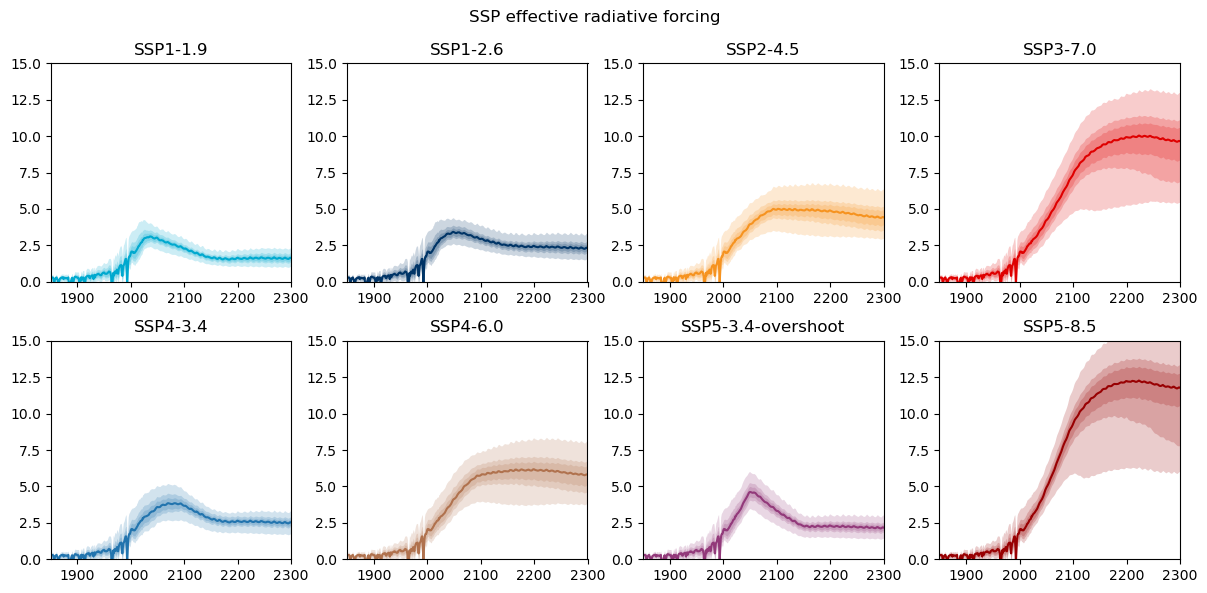

In [20]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

for i, scenario in enumerate(scenarios):
    for pp in ((0, 100), (5, 95), (16, 84)):
        ax[i // 4, i % 4].fill_between(
            f.timebounds,
            np.percentile(
                f.forcing_sum.loc[dict(scenario=scenario)],
                pp[0],
                axis=1,
            ),
            np.percentile(
                f.forcing_sum.loc[dict(scenario=scenario)],
                pp[1],
                axis=1,
            ),
            color=ar6_colors[scenarios[i]],
            alpha=0.2,
            lw=0
        )

    ax[i // 4, i % 4].plot(
        f.timebounds,
        np.median(
            f.forcing_sum.loc[dict(scenario=scenario)],
            axis=1,
        ),
        color=ar6_colors[scenarios[i]],
    )
    ax[i // 4, i % 4].set_xlim(1850, 2300)
    ax[i // 4, i % 4].set_ylim(0, 15)
    ax[i // 4, i % 4].axhline(0, color="k", ls=":", lw=0.5)
    ax[i // 4, i % 4].set_title(fancy_titles[scenarios[i]])

plt.suptitle("SSP effective radiative forcing")
fig.tight_layout()

In [21]:
#f.forcing_sum.loc[dict(scenario=scenario)]
scenario_init = 'ssp126'
f.forcing_sum.loc[dict(scenario=scenario_init)].sel(timebounds=slice(1850,2100))

<xarray.DataArray (timebounds: 251, config: 1001)>
array([[0.29394585, 0.35122753, 0.17382484, ..., 0.22793519, 0.16431118,
        0.26306462],
       [0.29373788, 0.35998967, 0.17556304, ..., 0.24471039, 0.17490421,
        0.25900095],
       [0.30489195, 0.35867342, 0.19767538, ..., 0.24353054, 0.19257681,
        0.29065109],
       ...,
       [2.986673  , 2.91362859, 3.04962833, ..., 2.75865785, 2.99852412,
        3.23058182],
       [2.98198659, 2.89072971, 3.04048508, ..., 2.74163859, 2.98742444,
        3.22551437],
       [2.97506395, 2.8782257 , 3.04265616, ..., 2.74990275, 2.99076815,
        3.22965015]])
Coordinates:
  * timebounds  (timebounds) float64 1.85e+03 1.851e+03 ... 2.099e+03 2.1e+03
    scenario    <U11 'ssp126'
  * config      (config) int64 1230 1715 2658 3898 ... 1497041 1497105 1498424

In [22]:
import ERFutils
import xarray as xr
import scipy.signal as signal
model_set = ERFutils.model_set
output_path = ERFutils.path_to_ERF_outputs
A = ERFutils.A
save = False

train = '1pctCO2'

# Import Green's Functions
G_ds_path = f'{output_path}GFs/G_loess_man_{train}_ERF_mean_ds.nc4'
G_ds = xr.open_dataset(G_ds_path)['G[tas]']

G_ds.name = 'G[tas]'
G_ds = G_ds.rename({'year':'s'})

print(f'Convolving FaIR with {train} Green\'s Function...')
      
#conv_mean_ds = ERFutils.convolve_exp_meanGF(G_ds, ERF_ds, train, conv_mean = True)
#conv_ds = ERFutils.convolve_exp_meanGF(G_ds, ERF_ds, train, conv_mean = False)

Convolving FaIR with 1pctCO2 Green's Function...


In [25]:
def convolve_FaIR(G_ds, conv_mean=True, lat_lon = None,scenario_init=None):

    if conv_mean:
        G_ds = G_ds.weighted(A).mean(dim = ['lat','lon'])
        GF = G_ds

    else:
        GF = G_ds.sel(lat = lat_lon[0], lon = lat_lon[1])

    ERF_ds = f.forcing_sum.loc[dict(scenario=scenario_init)].sel(timebounds=slice(1850,2100))
    length = max(len(GF.dropna(dim = 's')['s']),len(np.array(ERF_ds)))

    all_conv = [signal.convolve(np.array(GF.dropna(dim = 's')),
                                np.array(ERF_ds.sel(config=conf)),
                                'full')[:length] for conf in ERF_ds.config]
    
    return all_conv

Scenario: ssp245
	Location: Global Mean
1.3470945358276367
	Location: Kalahari Desert
1.290588140487671
	Location: Palau
1.2933967113494873
Scenario: ssp585
	Location: Global Mean
1.3661139011383057
	Location: Kalahari Desert
1.2917218208312988
	Location: Palau
1.2908799648284912


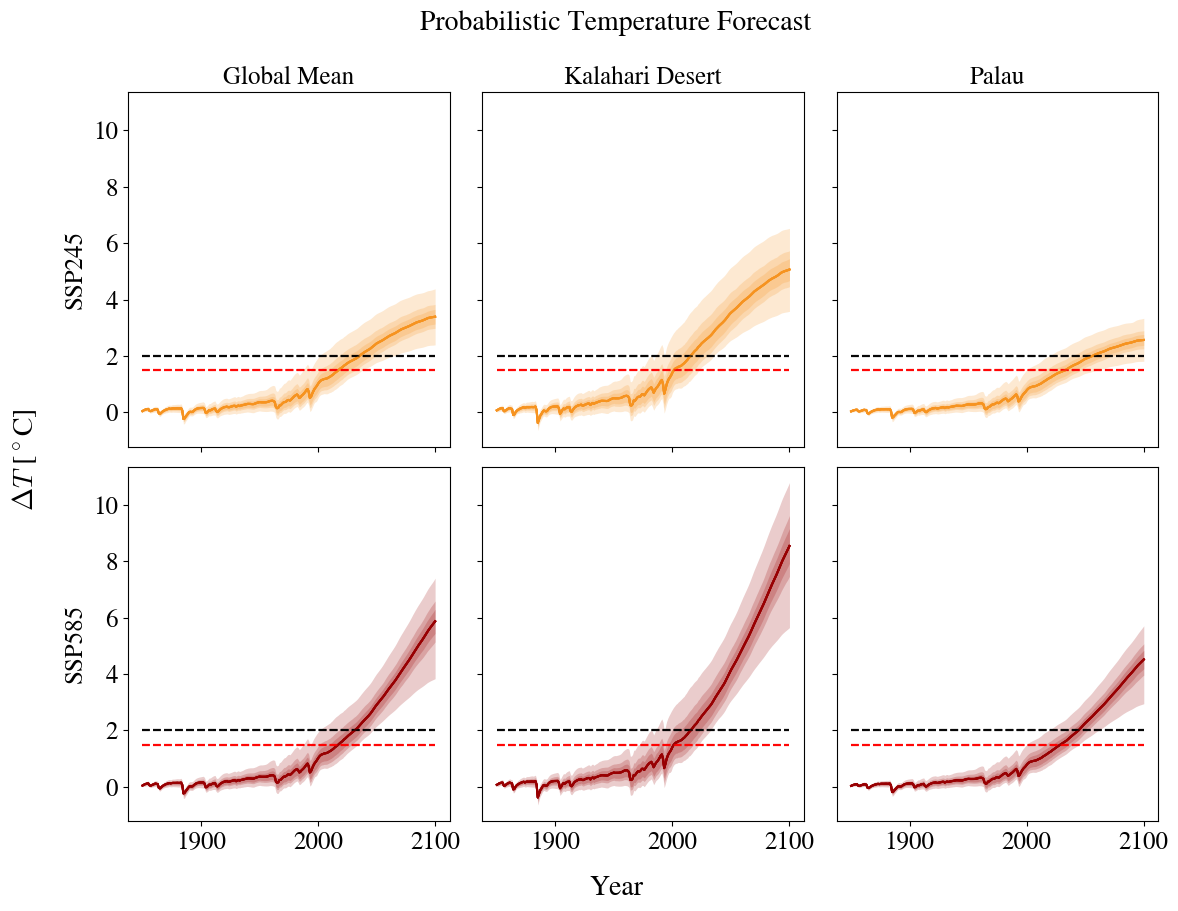

In [37]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import time


lat_lon = [0,(-20.5, 21),(7.5, 134)]

labels = ['Global Mean','Kalahari Desert','Palau']
scens = ['ssp245','ssp585']
scens_cap = ['SSP245','SSP585']

fig, ax = plt.subplots(len(scens),len(lat_lon),figsize=(12, 9),sharey=True,sharex='col')

for j in range(len(scens)):
    scenario_init = scens[j]
    print(f'Scenario: {scenario_init}')
    
    for i in range(len(lat_lon)):
        print(f'\tLocation: {labels[i]}')
        start = time.time()
        if i == 0:
            all_conv = convolve_FaIR(G_ds,conv_mean=True, lat_lon = None, scenario_init=scenario_init)
        else:
            all_conv = convolve_FaIR(G_ds,conv_mean=False, lat_lon = lat_lon[i],scenario_init=scenario_init)
        end = time.time()
        print(end - start)


        for pp in ((0, 100), (5, 95), (16, 84), (50,50)):
            pct0 = np.percentile(all_conv,pp[0],axis=0)
            pct1 = np.percentile(all_conv,pp[1],axis=0)

            ax[j,i].fill_between(np.linspace(1850,1850 + len(all_conv[0])-1,len(all_conv[0])),
                            pct0,
                            pct1,
                            color=ar6_colors[scenario_init],
                            alpha=0.2,
                            lw=0)
            
            ax[j,i].plot(np.linspace(1850,1850 + len(all_conv[0])-1,len(all_conv[0])),
                         np.mean(all_conv,axis=0),
                         color=ar6_colors[scenario_init])
            
            ax[j,i].hlines(1.5, 1850, 2100, colors='r', linestyles='dashed', alpha = 0.6)
            ax[j,i].hlines(2, 1850, 2100, colors='k', linestyles='dashed', alpha = 0.6)

            ax[j,i].tick_params(axis='both', which='major', labelsize=18)

rows = ['Row {}'.format(row) for row in ['A', 'B', 'C', 'D']]

for axi, col in zip(ax[0], labels):
    axi.set_title(col, fontsize=18)

for axi, row in zip(ax[:,0], scens_cap):
    axi.set_ylabel(row, fontsize=18)
            
fig.supxlabel('Year',fontsize=20,x=0.525)
fig.supylabel('$\Delta T$ [$^\circ$C]',fontsize=20)
fig.suptitle('Probabilistic Temperature Forecast',fontsize=20,y=1.0,x=0.525)
fig.tight_layout()

output_path = ERFutils.path_to_ERF_outputs
figure_path = ERFutils.path_to_figures

save = True
if save:
    plt.savefig(f'{figure_path}spatial_prob_v3.pdf', bbox_inches = 'tight', dpi = 350)